# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [2]:
df = pd.read_csv("/content/hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#Análise Exploratória

In [4]:
print('Dimensões do dataset temps',df.shape)

Dimensões do dataset temps (17379, 17)


In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#Exclusão de colunas

In [7]:
df = df.drop(columns = ['instant' , 'dteday' , 'yr'])
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#Gráficos

[Text(0.5, 1.0, 'Número de bicicletas por mês')]

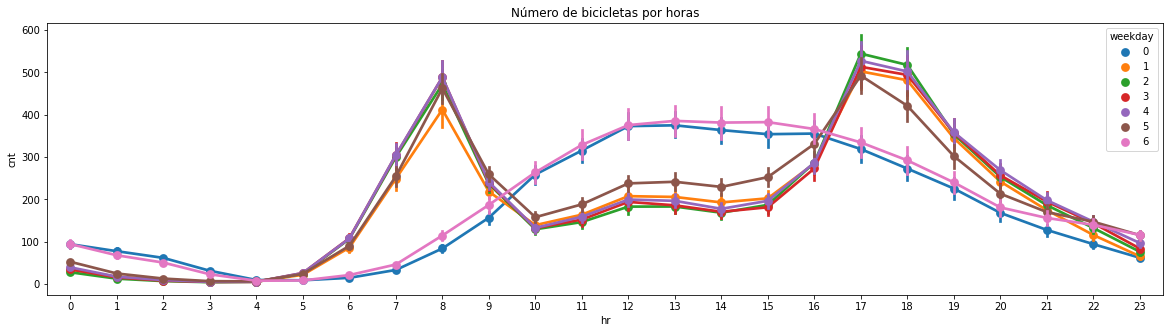

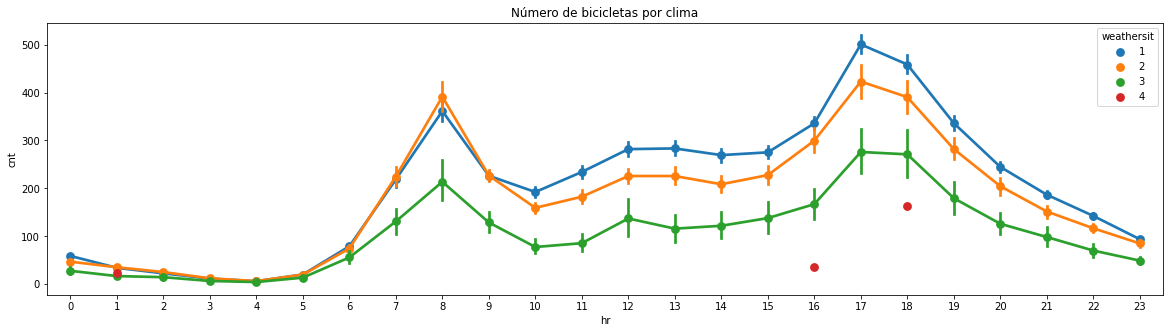

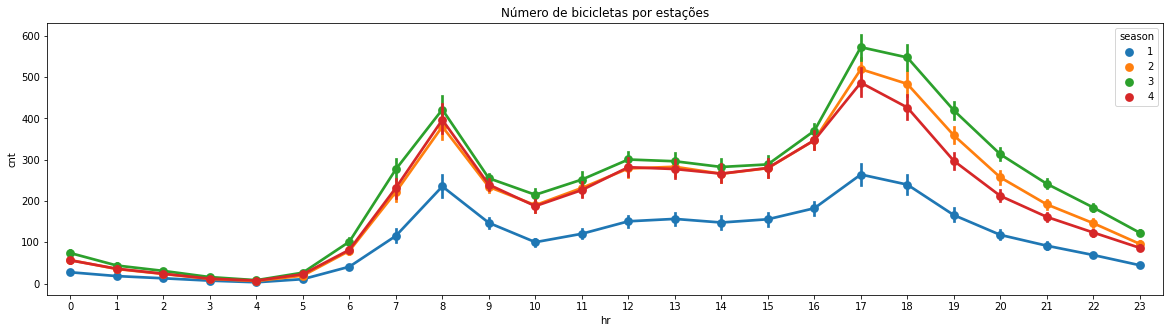

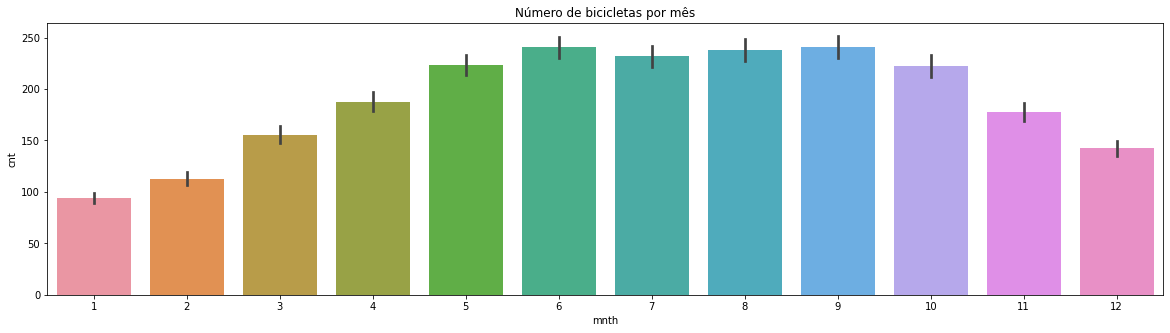

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Número de bicicletas por horas')
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Número de bicicletas por clima')
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax)
ax.set(title='Número de bicicletas por estações')
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Número de bicicletas por mês')

#Preparação dos dados

In [9]:
df['cnt'] = np.log(df['cnt'])
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [10]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)

In [11]:
df_oh.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#Treinamento do Modelo

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
modelos = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),
         GradientBoostingRegressor()]
from sklearn import model_selection
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'cnt'], axis=1)
y = df_oh['cnt']
print(X.head())
print(y.head())   

   temp   hum  season_2  ...  weathersit_2  weathersit_3  weathersit_4
0  0.24  0.81         0  ...             0             0             0
1  0.22  0.80         0  ...             0             0             0
2  0.22  0.80         0  ...             0             0             0
3  0.24  0.75         0  ...             0             0             0
4  0.24  0.75         0  ...             0             0             0

[5 rows x 50 columns]
0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: cnt, dtype: float64


In [13]:
def treinamento(modelo):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(modelo, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Modelo:',modelo)
    print('CV score:', abs(cv_score))
    print('---------------------------------------')

In [14]:
for modelo in modelos:
    treinamento(modelo)

Modelo: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV score: 0.6313301520117317
---------------------------------------
Modelo: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV score: 0.6304079414191434
---------------------------------------
Modelo: HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
CV score: 0.6603309575018211
---------------------------------------
Modelo: ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
CV score: 0.6252222784219456
---------------------------------------
Modelo: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_dept